# Predicting the Insurance Cost of a Client

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the data and preparing it for modeling

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PRIYANG-BHATT/Datasets-Youtube-Pandas/main/DS/insurance.csv")

In [3]:
# view df
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

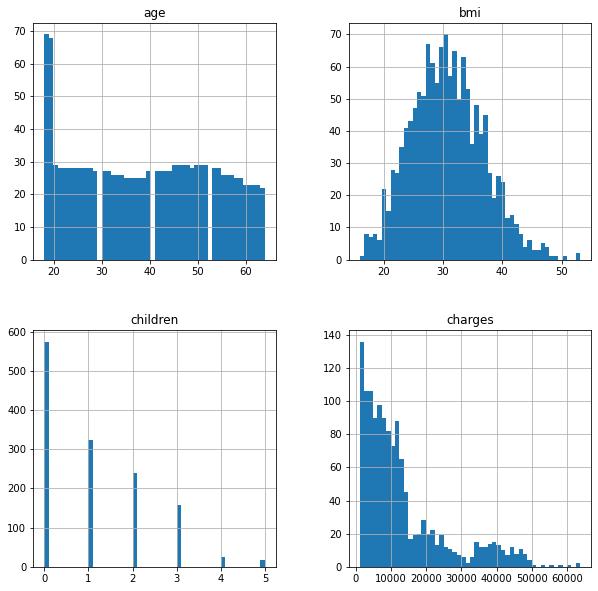

In [6]:
data.hist(bins=50, figsize=(10,10));

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Charges vs Age')

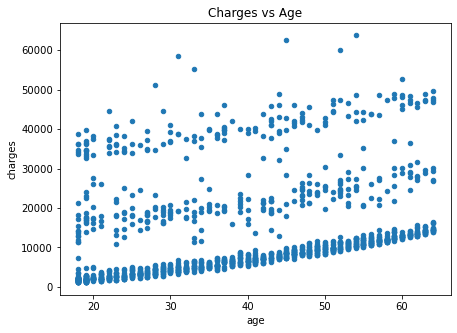

In [8]:
data.plot(kind="scatter",
         x= "age",
         y= "charges",
         figsize=(7,5))
plt.title("Charges vs Age")

In [9]:
# make copy of df
df = data.copy()

In [10]:
# encode gender attribute
df["sex"] = df["sex"].map({"female":0, "male":1})

In [11]:
# encode smoke attribute
df["smoker"] = df["smoker"].map({"no":0, "yes":1})

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
# encode region attribute
df["region"] = df["region"].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


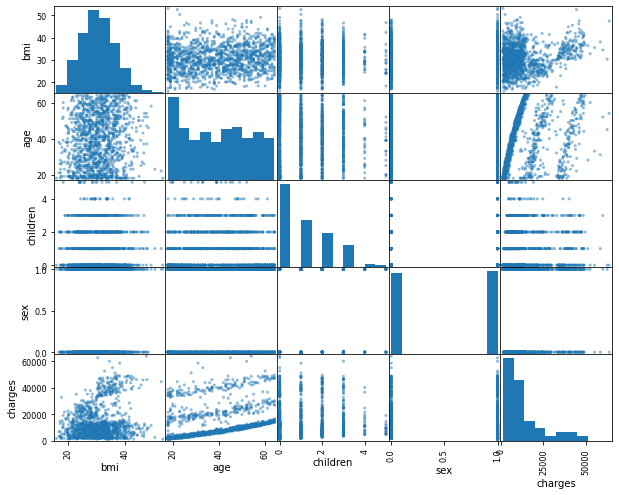

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["bmi", "age", "children", "sex", "charges"]
scatter_matrix(df[attributes],
              figsize=(10, 8))
plt.show()

## Modeling

In [17]:
#split X/y

X = df.drop("charges", axis= 1)
y = df["charges"]

In [18]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [19]:
y[:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
#Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [22]:
#instantiate model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

### Model training

In [23]:
rf= RandomForestRegressor()
lr= LinearRegression()
svr= SVR()
gbr= GradientBoostingRegressor()

In [41]:
model_list = {rf,
              lr,
              svr,
              gbr}

np.random.seed(42)
model_scores = {}
for model in model_list:
    model.fit(X_train, y_train)
    model_scores[model] = model.score(X_test, y_test)
print("mean absolute error")
    model_scores[model] = mean()
    
    
# make prediction
y_pred1= rf.predict(X_test)
y_pred2=  lr.predict(X_test)
y_pred3=  svr.predict(X_test)
y_pred4=  gbr.predict(X_test)
    
df1 = pd.DataFrame({"Actual": y_test,
                    "RandForest": y_pred1,
                    "LinRegress": y_pred2,
                    "SVR": y_pred3,
                    "GradientB": y_pred4})
model_scores

{LinearRegression(): 0.7833463107364539,
 GradientBoostingRegressor(): 0.8779726251291786,
 SVR(): -0.07230841842488811,
 RandomForestRegressor(): 0.8656436871368448}

### Prediction on Test Data

In [42]:
df1.head()

,Actual,RandForest,LinRegress,SVR,GradientB
764,9095.06825,11460.973306,8924.407244,9548.501784,11001.128629
887,5272.17580,5183.765155,7116.295018,9493.253027,5840.174656
890,29330.98315,28271.766104,36909.013521,9648.297116,28001.980112
1293,9301.89355,10444.305975,9507.874691,9555.223014,9745.291602
259,33750.29180,34523.490402,27013.350008,9421.474560,33639.100981


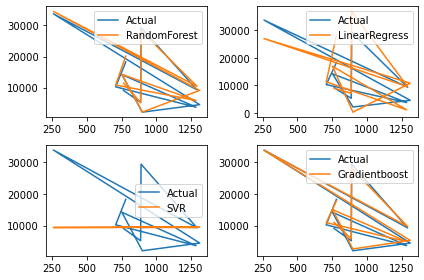

In [40]:
plt.subplot(221)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["RandForest"].iloc[0:11], label="RandomForest")
plt.legend()

plt.subplot(222)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["LinRegress"].iloc[0:11], label="LinearRegress")
plt.legend()

plt.subplot(223)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["SVR"].iloc[0:11], label="SVR")
plt.legend()

plt.subplot(224)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["GradientB"].iloc[0:11], label="Gradientboost")
plt.legend()

plt.tight_layout()

plt.legend()

### Evaluating the Algorithm

In [46]:
predictions = [y_pred1, y_pred2, y_pred3, y_pred4]

In [45]:
model_scores

{LinearRegression(): 0.7833463107364539,
 GradientBoostingRegressor(): 0.8779726251291786,
 SVR(): -0.07230841842488811,
 RandomForestRegressor(): 0.8656436871368448}

In [50]:
from sklearn.metrics import mean_absolute_error

s1 = mean_absolute_error(y_test, y_pred1)
s2 = mean_absolute_error(y_test, y_pred2)
s3 = mean_absolute_error(y_test, y_pred3)
s4 = mean_absolute_error(y_test, y_pred4)

In [51]:
print(s1, s2, s3, s4)

2467.4783075645832 4186.508898366434 8592.79866979489 2447.951558054584


### Predict Charges For New Customer

In [61]:
data = {"age": 40,
       "sex": 1,
       "bmi": 40.30,
       "children": 3,
       "smoker": 0,
       "region": 2}

df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,3,0,2


In [62]:
rf.predict(df)

array([8262.0165417])

## Save model using Joblib

In [67]:
# train on all data
gr = GradientBoostingRegressor()
gr.fit(X, y)

GradientBoostingRegressor()

In [64]:
import joblib

# save model
joblib.dump(gr,"insurance_cost")

['insurance_cost']

In [65]:
#load model
model = joblib.load("insurance_cost")

In [66]:
model.predict(df)

array([8754.99161533])

## GUI

In [68]:
from tkinter import *
import joblib

In [85]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load("insurance_cost")
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text="Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)



master = Tk()
master.title("Insurance Cost Prediction")
label = Label(master, 
              text = "Insurance Cost Prediction", 
              bg= "black",
              fg= "white").grid(row=0, columnspan=2)

Label(master, text = "Enter Your Age").grid(row=1)
Label(master, text = "Male or Female [1/0]").grid(row=2)
Label(master, text = "Enter Your BMI value").grid(row=3)
Label(master, text = "Enter Number of children").grid(row=4)
Label(master, text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master, text = "Region [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master,
       text ="Predict", 
       command= show_entry).grid()

mainloop()